### Exercício 7 realizado por Alícia Gouveia e Sofia Rodrigues

Using the dataset in EFIplus_medit.zip:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest

In [2]:
#Load the dataset
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

Check the if any of the continuous environmental variables in the EFIplus_medit dataset (Altitude, Actual_river_slope, Elevation_mean_catch, prec_ann_catch, temp_ann, temp_jan, temp_jul) would
require a data transformation in order to apply parametric tests.

In [3]:
# Select continuous environmental variables
continuous_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

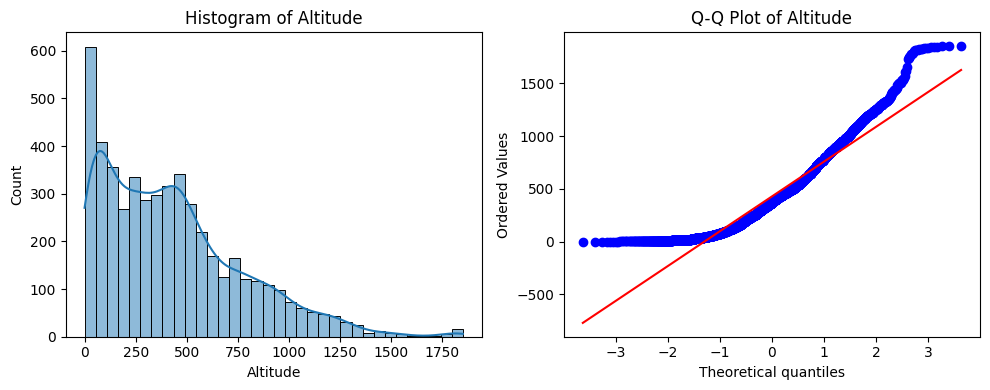

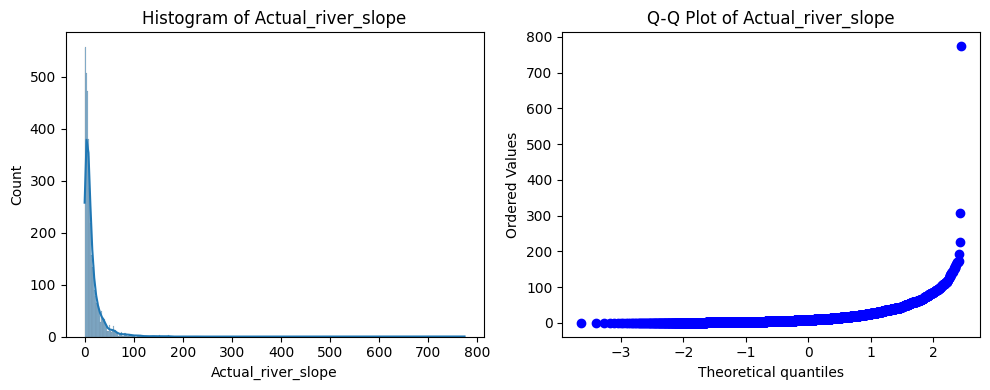

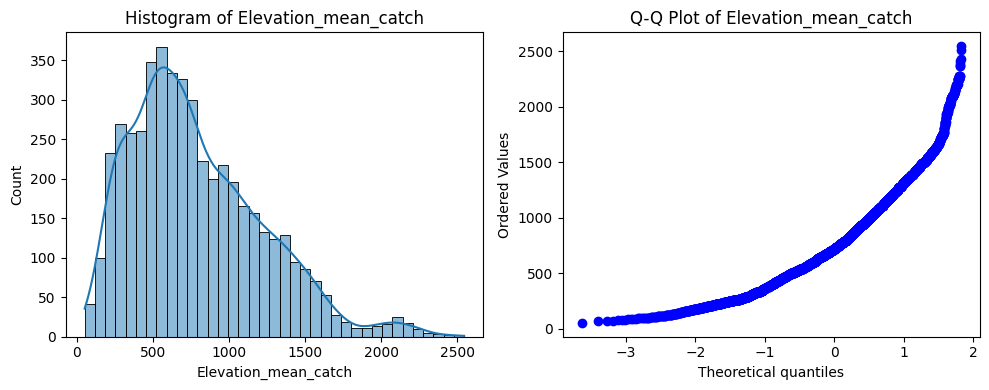

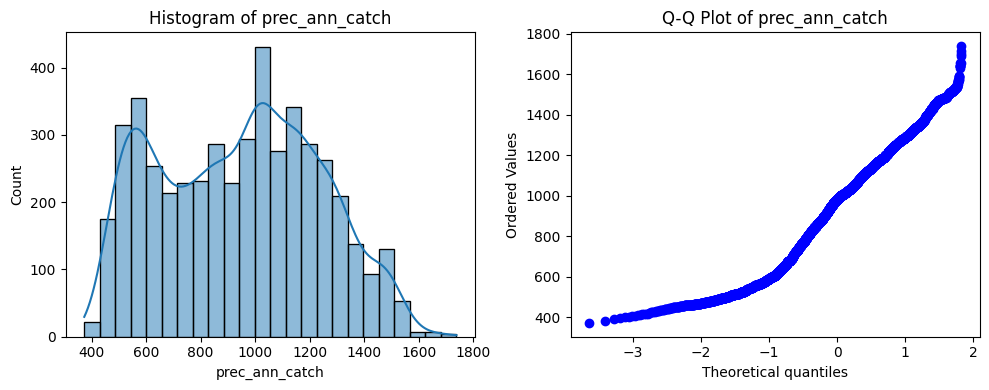

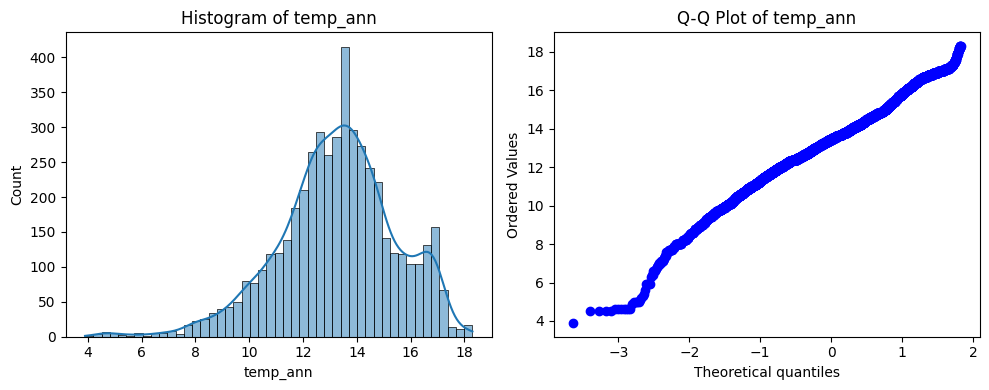

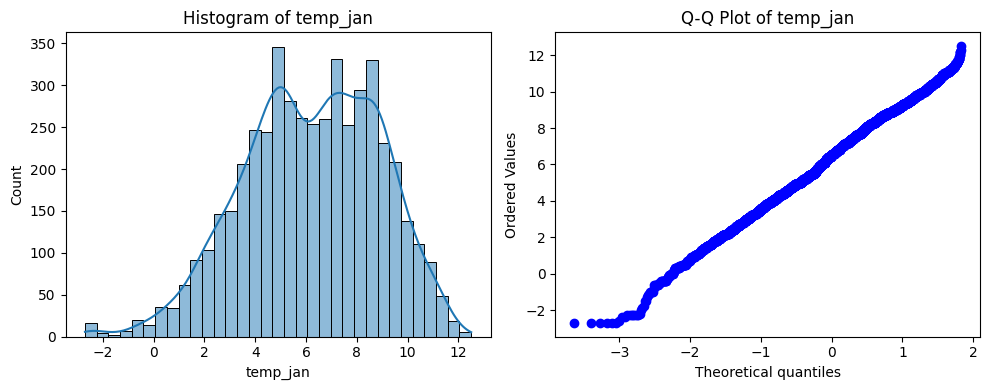

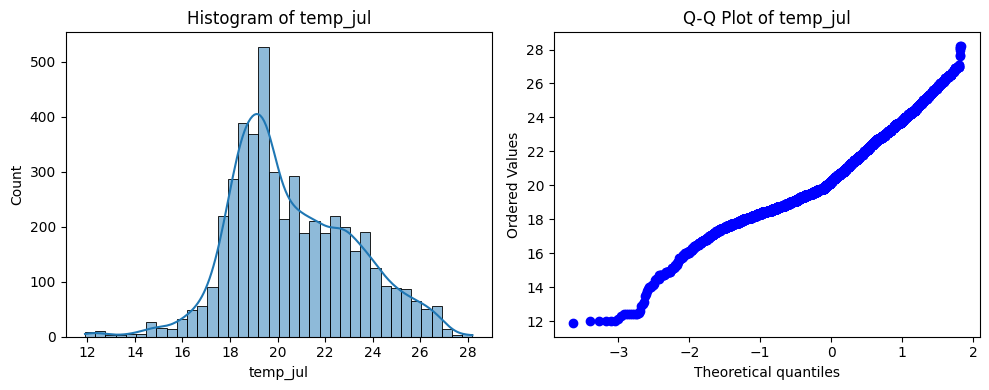

In [4]:
# Visual inspection for Normality
for var in continuous_vars:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')

    plt.tight_layout()
    plt.show()

#By observing the histograms and Q-Q plots, you can get a sense of whether the data are approximately normally distributed
#If the data appear skewed or deviate substantially from the diagonal line in the Q-Q plot, transformation may be necessary


Apply the appropriate data transformation and check the new distributions.

Logarithmic transformation is commonly used for several reasons:

- Stabilizing Variance: If the data exhibit heteroscedasticity (unequal variances across the range of values), a logarithmic transformation can help stabilize the variance. This is particularly important in regression analysis, where homoscedasticity is assumed.
- Normalization: Logarithmic transformation can often make the distribution of the data closer to a normal distribution. This can be helpful when parametric statistical tests assume normality.
- Handling Skewed Data: Logarithmic transformation can reduce the skewness of the data, especially if the original data are heavily skewed to the right (positively skewed). By compressing larger values more than smaller ones, it can make the distribution more symmetric.
- Interpretability: In some cases, the transformed variable may have more interpretable units. For example, when dealing with monetary values or other quantities that grow exponentially, taking the logarithm can transform them into more interpretable units.
- Handling Multiplicative Effects: In situations where the relationship between variables is multiplicative rather than additive, logarithmic transformation can linearize the relationship, making it easier to analyze using linear models.

C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


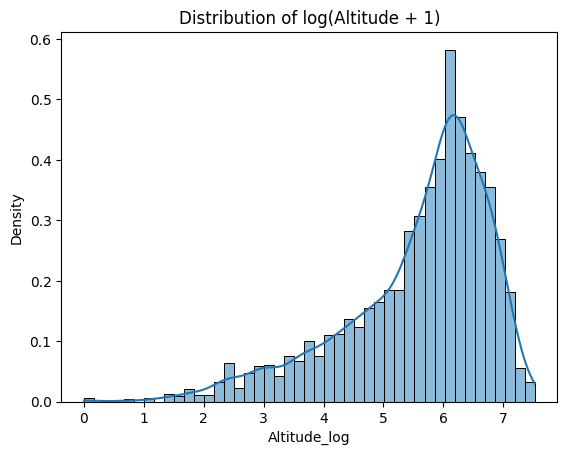

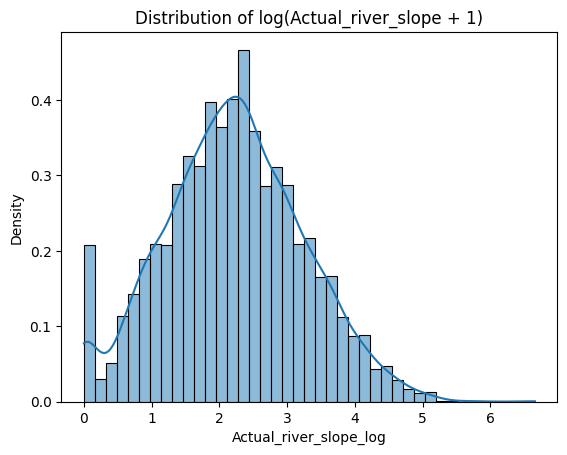

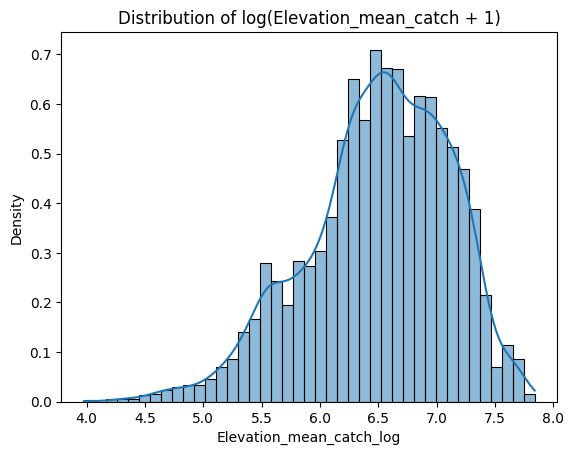

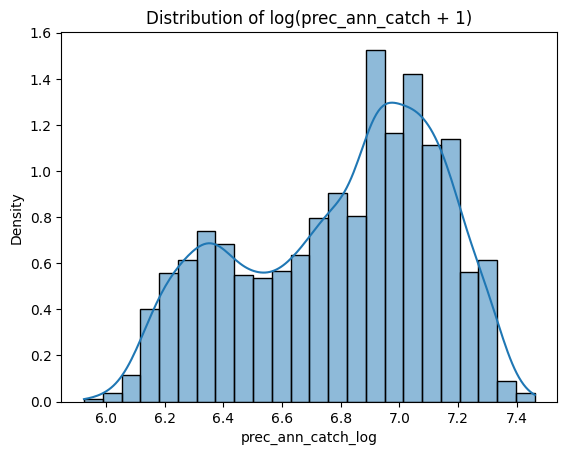

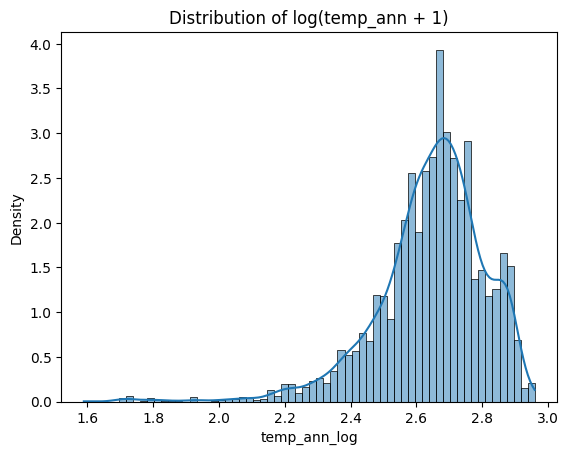

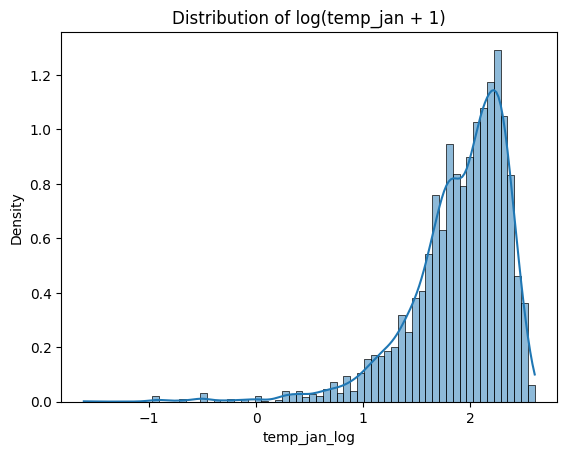

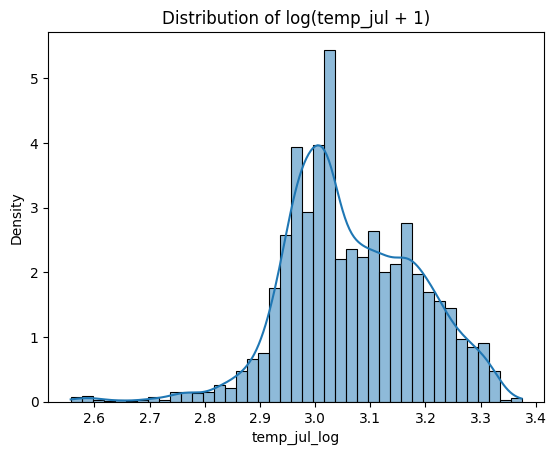

In [5]:
# Log transformation
for var in continuous_vars:
    df[f'{var}_log'] = np.log(df[var] + 1)  # Adding 1 to handle zero values, if any

# Visual inspection of transformed distributions
for var in continuous_vars:
    sns.histplot(df[f'{var}_log'], kde=True, stat="density")
    plt.title(f'Distribution of log({var} + 1)')
    plt.show()

Create a column with the total number of species present (the species richness) in each sampling site (the first species in the dataset is 'Abramis brama' and all the columns to the right are all species)

In [6]:
# Get the columns for species
species_columns = df.columns[df.columns.get_loc('Abramis brama'):]

# Calculate species richness
df['Species_Richness'] = df[species_columns].sum(axis=1)

# Print just the 'Species_Richness' column
print(df['Species_Richness'])

#IF KEEP RUNNING THE NUMBERS KEEP CHANGING

0       27.657933
1       30.438726
2       30.432430
3       31.203007
4       31.708294
          ...    
5006    33.855475
5007    33.479561
5008    33.824756
5009    33.010731
5010    35.673860
Name: Species_Richness, Length: 5011, dtype: float64


Check the existence of bivariate outliers in the relationship between Mean Annual Temperature (temp_ann) and species richness using an appropriate plot. Run a bivariate isolation forest to detect outliers and plot the result.

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)


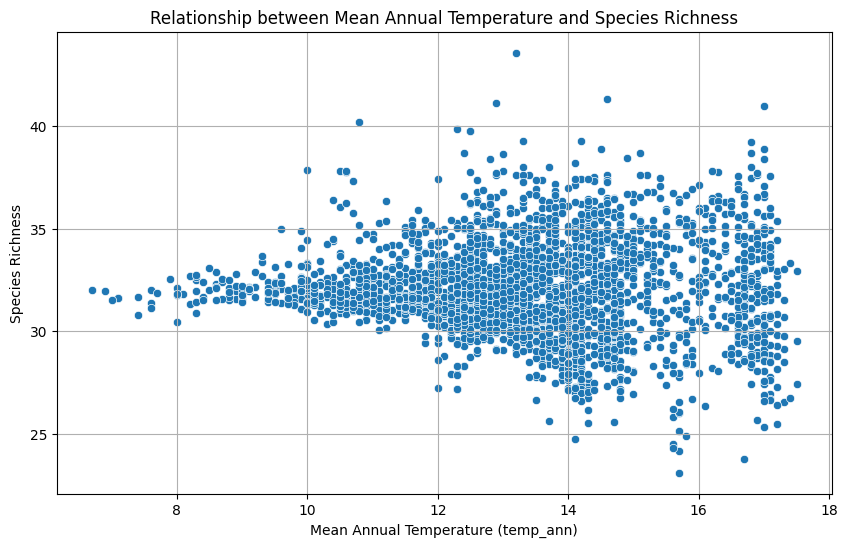

In [8]:
# Plotting the relationship between Mean Annual Temperature (temp_ann) and species richness
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp_ann', y='Species_Richness')
plt.title('Relationship between Mean Annual Temperature and Species Richness')
plt.xlabel('Mean Annual Temperature (temp_ann)')
plt.ylabel('Species Richness')
plt.grid(True)
plt.show()

In [9]:
# Running a bivariate isolation forest to detect outliers
X = df[['temp_ann', 'Species_Richness']]

# Training the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(X)

IsolationForest(contamination=0.05)

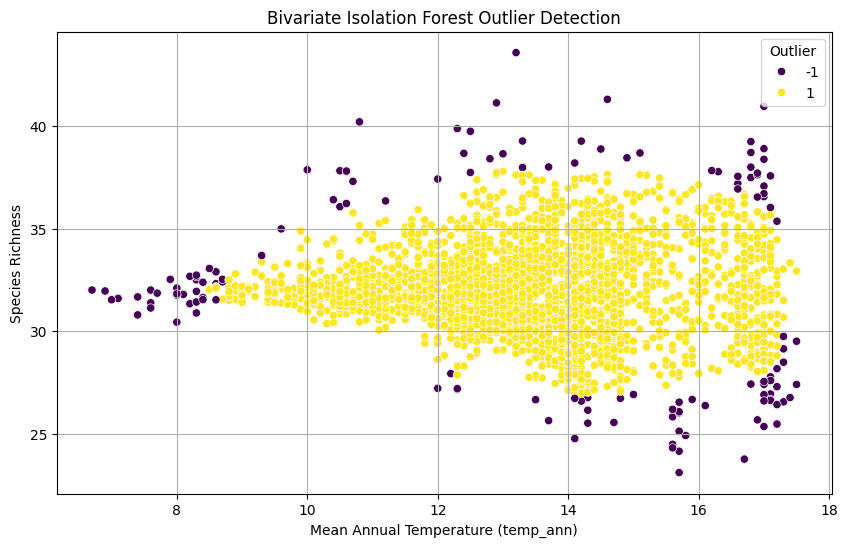

In [10]:
# Predicting outliers
df['Outlier'] = iso_forest.predict(X)
outliers = df[df['Outlier'] == -1]

# Plotting the result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp_ann', y='Species_Richness', hue='Outlier', palette='viridis')
plt.title('Bivariate Isolation Forest Outlier Detection')
plt.xlabel('Mean Annual Temperature (temp_ann)')
plt.ylabel('Species Richness')
plt.legend(title='Outlier')
plt.grid(True)
plt.show()